In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import urllib.request
import os
from  selenium.webdriver.common.by import By

In [2]:
def set_chrome_driver():
    chrome_options = webdriver.ChromeOptions()
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    return driver


def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

In [68]:
def crawling_img(val):
    driver = webdriver.Chrome('./chromedriver')
    driver.get("https://www.google.co.kr/imghp?hl=ko&tab=wi&authuser=0&ogbl")
    driver.execute_script("document.querySelector('input').value = '" + val + "'")  # 검색창에 검색어 입력
    driver.execute_script("document.querySelector('form').submit()")  # 검색 요청 (검색 폼 제출)

    # 스크롤 끝까지 내려 검색결과 더 보기
    # 테스트를 빨리 하려고 스크롤 안 내린다. 이 부분 주석처리를 풀면 스크롤을 끝까지 내린다.
    SCROLL_PAUSE_TIME = 1
    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")  # 페이지의 세로길이
    while True:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  # 브라우저 끝까지 스크롤을 내림
        time.sleep(SCROLL_PAUSE_TIME)  # 추가 검색결과가 뜰 동안 기다린다
        # 페이지의 세로길이가 기존과 비교해서 더 길어지지 않았으면 추가 검색결과가 없는 것이므로 반복 종료
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
            try:
                driver.find_elements(By.CSS_SELECTOR,'mye4qd')
                # driver.find_element_by_css_selector(".mye4qd").click()
            except:
                break
        last_height = new_height

    imgs = driver.find_elements(By.CSS_SELECTOR, ".rg_i.Q4LuWd")  # 이미지 요소들 모두 찾기
    
    dir_path = "../Data/crawling/" + val  # 이미지 저장 경로 (리눅스)
    # dir_path = ".\idols" + "\\" + val  # 이미지 저장 경로 (윈도우)
    createDirectory(dir_path)  # 이미지들 저장할 폴더 생성
    count = 0  # 이미지 번호
    for img in imgs:  # 각 이미지 순회
        # if count > 5:  # 테스트용으로 이미지 5개만 다운로드 한다. 검색결과 페이지를 모두 긁으려면 이 조건문을 없앤다.
        #     break
        if count == 105 or count == 109 or count == 84:
            print('continue!!')
            count = count + 1
            continue
        try:
            img.click()  # 검색결과 이미지를 클릭하여
            time.sleep(1)  # 상세보기가 다운될 동안 대기
            imgUrl  = driver.find_element(By.XPATH,
                '//*[@id="Sva75c"]/div[2]/div/div[2]/div[2]/div[2]/c-wiz/div/div[1]/div[2]/div[2]/div/a/img').get_attribute(
                "src")  # 구글 이미지검색결과 페이지의 내부구조가 바뀌면 여길 수정해야 한다.
            
            urllib.request.urlretrieve(imgUrl, dir_path + "/" + keyword +'_'+ str(count).zfill(3) + ".jpg")
            print(f'count: {count}, imgUrl: {imgUrl}')
            count = count + 1
            
            # 이미지 갯수
            if count > max_cnt:
                break
        except Exception as e:
            print(e)
    driver.close()


In [69]:
max_cnt = 250 # 크롤링 할 이미지 갯수
searchVals = ["fire disaster images"]  # 검색어 (목록)
keyword = 'fire'  # 키워드 (파일명)

/tmp/ipykernel_4431/877495316.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver')


count: 0, imgUrl: https://cff2.earth.com/uploads/2017/10/15200729/The-10-worst-fire-disasters-in-U.S.-history.jpg
count: 1, imgUrl: https://upload.wikimedia.org/wikipedia/commons/0/05/Burnout_ops_on_Mangum_Fire_McCall_Smokejumpers.jpg
count: 2, imgUrl: https://static01.nyt.com/images/2020/08/04/climate/04CLI-DISASTERS1/04CLI-DISASTERS1-mediumSquareAt3X.jpg
count: 3, imgUrl: 
count: 4, imgUrl: https://cdn.britannica.com/42/188142-050-4D4D9D19/wildfire-Stanislaus-National-Forest-California-2013.jpg
count: 5, imgUrl: https://idsb.tmgrup.com.tr/ly/uploads/images/2020/12/02/76266.jpg
count: 6, imgUrl: https://idsb.tmgrup.com.tr/ly/uploads/images/2020/12/02/76276.jpg
count: 7, imgUrl: https://cdn.cnn.com/cnnnext/dam/assets/180805185018-carr-fire-july-31-super-tease.jpg
count: 8, imgUrl: 
count: 9, imgUrl: 
count: 10, imgUrl: 
HTTP Error 403: Forbidden
count: 11, imgUrl: 
count: 12, imgUrl: https://images.news18.com/ibnlive/uploads/2020/08/1596424357_1596179073_chiberta-forest-fire.jpg?impoli
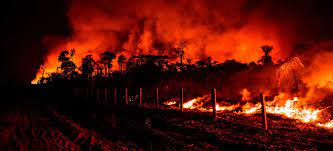
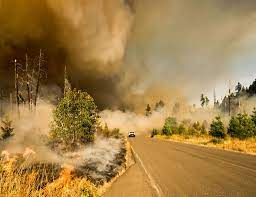
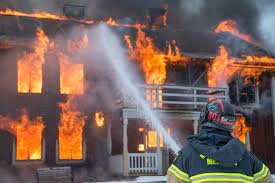
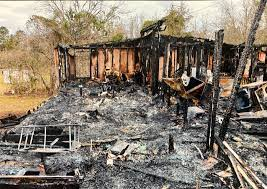
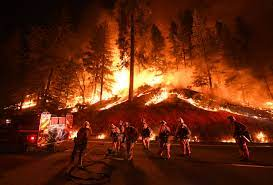

In [70]:
for val in searchVals:  # 각 검색어별로
    crawling_img(val)  # 크롤링

In [ ]:
for i in range(1,15):
    print(str(i).zfill(3))